# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [13]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_selector, ColumnTransformer
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [3]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

In [4]:
penguins = penguins.dropna()

In [5]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)


In [6]:
X = penguins.drop(['species'], axis=1)
y = penguins['species']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

## kNN Model 1

In [11]:
knn= KNeighborsClassifier(n_neighbors=2)

my_pipeline = Pipeline(
    [('preprocessing',ct),('KNN',knn)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
#overall accuracy
knn1test = accuracy_score(y_test, y_preds)
knn1test

0.9880952380952381

In [12]:
#confusion matrix
cm = confusion_matrix(y_test, fitted_pipeline.predict(X_test))
print(cm)

[[31  0  0]
 [ 1 18  0]
 [ 0  0 34]]


In [15]:
# After predicting y_preds
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_preds_binarized = label_binarize(y_preds, classes=np.unique(y))

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_preds, average=None)
recall = recall_score(y_test, y_preds, average=None)
f1 = f1_score(y_test, y_preds, average=None)

# Calculate AUC for each class
auc = [roc_auc_score(y_test_binarized[:, i], y_preds_binarized[:, i]) for i in range(y_test_binarized.shape[1])]

species_names = np.unique(y)

metrics_dict = {
    'Species': species_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': auc
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Species,Precision,Recall,F1 Score,AUC
0,Adelie,0.96875,1.000000,0.984127,0.990566
1,Chinstrap,1.00000,0.947368,0.972973,0.973684
2,Gentoo,1.00000,1.000000,1.000000,1.000000


## kNN Model 2

In [18]:
knn= KNeighborsClassifier(n_neighbors=100)

my_pipeline = Pipeline(
    [('preprocessing',ct),('KNN',knn)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
#overall accuracy
knn2test = accuracy_score(y_test, y_preds)
knn2test

0.8214285714285714

In [19]:
#confusion matrix
cm = confusion_matrix(y_test, fitted_pipeline.predict(X_test))
print(cm)

[[31  0  0]
 [15  4  0]
 [ 0  0 34]]


In [20]:
# After predicting y_preds
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_preds_binarized = label_binarize(y_preds, classes=np.unique(y))

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_preds, average=None)
recall = recall_score(y_test, y_preds, average=None)
f1 = f1_score(y_test, y_preds, average=None)

# Calculate AUC for each class
auc = [roc_auc_score(y_test_binarized[:, i], y_preds_binarized[:, i]) for i in range(y_test_binarized.shape[1])]

species_names = np.unique(y)

metrics_dict = {
    'Species': species_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': auc
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Species,Precision,Recall,F1 Score,AUC
0,Adelie,0.673913,1.000000,0.805195,0.858491
1,Chinstrap,1.000000,0.210526,0.347826,0.605263
2,Gentoo,1.000000,1.000000,1.000000,1.000000


## Decision Tree Model 1

In [21]:
det = DecisionTreeClassifier(min_impurity_decrease=0.01)

my_pipeline = Pipeline(
    [('preprocessing',ct),('DecTrees',det)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
d1test = accuracy_score(y_test, y_preds)

In [22]:
#confusion matrix
cm = confusion_matrix(y_test, fitted_pipeline.predict(X_test))
print(cm)

[[31  0  0]
 [ 2 17  0]
 [ 1  0 33]]


In [23]:
# After predicting y_preds
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_preds_binarized = label_binarize(y_preds, classes=np.unique(y))

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_preds, average=None)
recall = recall_score(y_test, y_preds, average=None)
f1 = f1_score(y_test, y_preds, average=None)

# Calculate AUC for each class
auc = [roc_auc_score(y_test_binarized[:, i], y_preds_binarized[:, i]) for i in range(y_test_binarized.shape[1])]

species_names = np.unique(y)

metrics_dict = {
    'Species': species_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': auc
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Species,Precision,Recall,F1 Score,AUC
0,Adelie,0.911765,1.000000,0.953846,0.971698
1,Chinstrap,1.000000,0.894737,0.944444,0.947368
2,Gentoo,1.000000,0.970588,0.985075,0.985294


## Decision Tree Model 2

In [28]:
det = DecisionTreeClassifier(min_impurity_decrease=0.1)

my_pipeline = Pipeline(
    [('preprocessing',ct),('DecTrees',det)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
d1test = accuracy_score(y_test, y_preds)

In [29]:
#confusion matrix
cm = confusion_matrix(y_test, fitted_pipeline.predict(X_test))
print(cm)

[[29  2  0]
 [ 2 16  1]
 [ 0  1 33]]


In [30]:
# After predicting y_preds
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_preds_binarized = label_binarize(y_preds, classes=np.unique(y))

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_preds, average=None)
recall = recall_score(y_test, y_preds, average=None)
f1 = f1_score(y_test, y_preds, average=None)

# Calculate AUC for each class
auc = [roc_auc_score(y_test_binarized[:, i], y_preds_binarized[:, i]) for i in range(y_test_binarized.shape[1])]

species_names = np.unique(y)

metrics_dict = {
    'Species': species_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': auc
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Species,Precision,Recall,F1 Score,AUC
0,Adelie,0.935484,0.935484,0.935484,0.948874
1,Chinstrap,0.842105,0.842105,0.842105,0.897976
2,Gentoo,0.970588,0.970588,0.970588,0.975294


ROC Curve

In [32]:
y_probs = fitted_pipeline.predict_proba(X_test)

# Assuming the order of classes is the same as in fitted_pipeline.classes_
# Find the index of 'Adelie' class
adelie_index = list(fitted_pipeline.named_steps['DecTrees'].classes_).index('Adelie')

# Extract probabilities of being 'Adelie'
adelie_probs = y_probs[:, adelie_index]

# Create a DataFrame
results_df = pd.DataFrame({
    'Actual Species': y_test,
    'Probability of Adelie': adelie_probs
})

results_df

,Actual Species,Probability of Adelie
33,Adelie,0.981982
112,Adelie,0.981982
19,Adelie,0.085106
100,Adelie,0.981982
312,Chinstrap,0.085106
...,...,...
229,Gentoo,0.021978
80,Adelie,0.981982
130,Adelie,0.981982
307,Chinstrap,0.085106


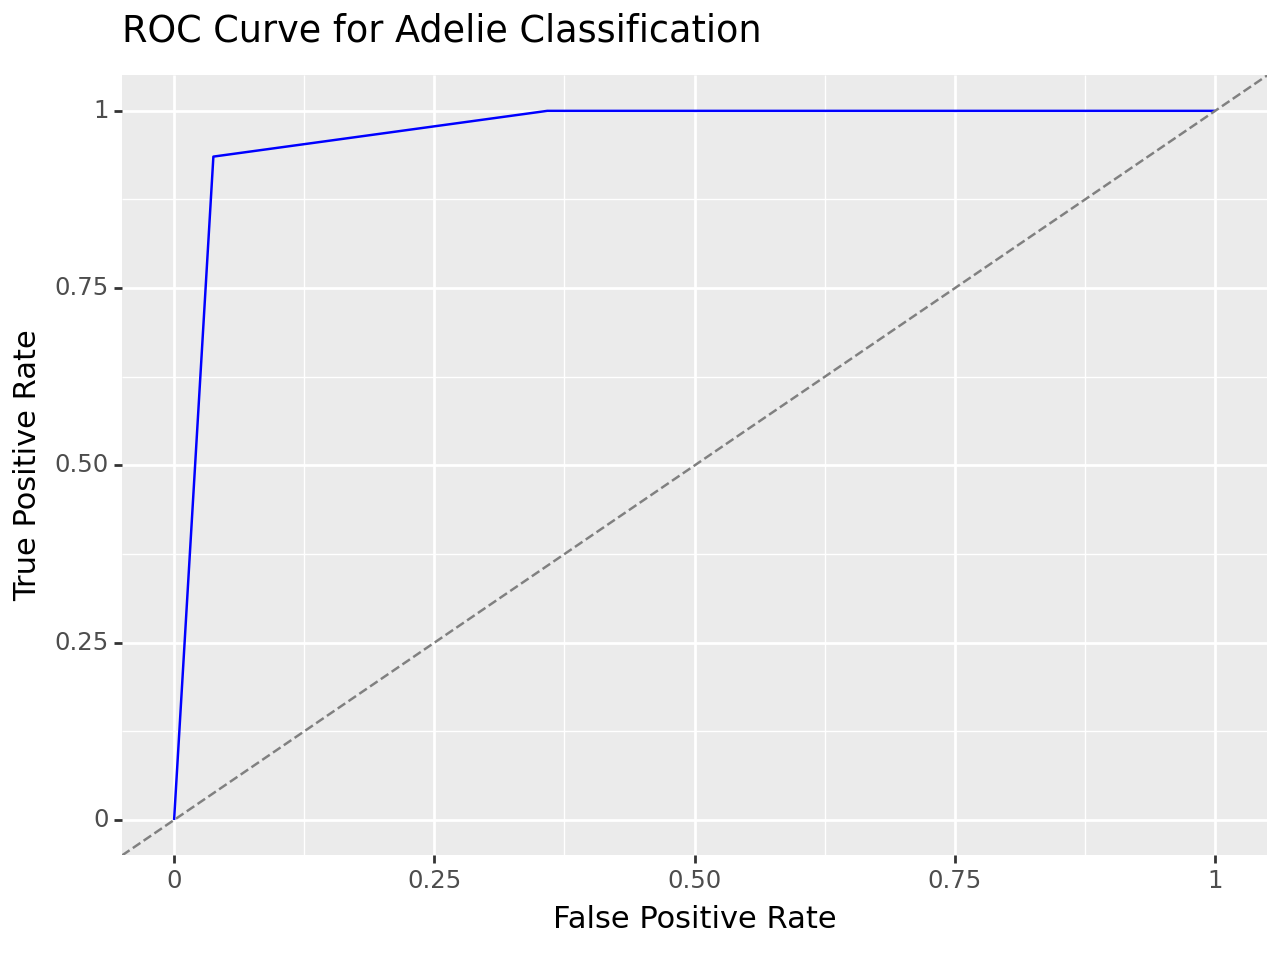

In [36]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_abline, labs
from sklearn.metrics import roc_curve

# Binarize y_test with Adelie as 1, others as 0
y_test_adelie = (y_test == 'Adelie').astype(int)

# Calculate TPR and FPR using roc_curve from sklearn
fpr, tpr, thresholds = roc_curve(y_test_adelie, adelie_probs)

roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Threshold': thresholds})


roc_plot = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(color='blue') +
    geom_abline(linetype='dashed', color='gray') +
    labs(title='ROC Curve for Adelie Classification', x='False Positive Rate', y='True Positive Rate')
)

print(roc_plot)
